# DIVI-Plot
Plots the DIVI Intesivregister data
## Imports, Definitions

In [18]:
from sys import exit
import csv
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt


dataFile = "/Users/cs/Desktop/Covid-Grafiken/DIVI-Rohdaten/zeitreihe-tagesdaten.csv"
gemeindeschlüssel = [6434]

debugTable = True
printTable = False

# EPOCH = np.datetime64('1970-01-01T00:00:00Z')
# ONE_SECOND = np.timedelta64(1, 's')

HOCHTAUNUSKREIS = [6434]

## Open DIVI CSV File

In [16]:

with open(dataFile) as csvFile:
    try:
        dialect = csv.Sniffer().sniff(csvFile.read(1024*8), delimiters=',\t')
        if debugTable:
            print( 'delimiter:        ' + repr( dialect.delimiter.encode() ) )
            print( 'doublequote:      ' + repr( dialect.doublequote ) )
            if dialect.escapechar:
                print( 'escapechar:      ' + repr( dialect.escapechar.encode() ) )
            else:
                print( 'escapechar:       None')
            print( 'lineterminator:   ' + repr( dialect.lineterminator.encode() ) )
            print( 'quotechar:        ' + repr( dialect.quotechar ) )
            print( 'quoting:          ' + repr( dialect.quoting ) )
            print( 'skipinitialspace: ' + repr( dialect.skipinitialspace ) )

        csvFile.seek(0) # let's start over with this file, sniffing above already read some bytes
        dataReader = csv.reader(csvFile, dialect)

        if printTable:
            for row in dataReader:
                print( row )
        
        # convFunc = lambda d: ( np.datetime64(d) - EPOCH ) / np.timedelta64(1, 's')
        convFunc = lambda d: (np.datetime64(d) - EPOCH) / ONE_SECOND
        divi = np.genfromtxt(csvFile, delimiter=',', names=True, converters={0: convFunc},
                                dtype=[ ('datum','f8'),
                                        ('bundesland','u2'),
                                        ('gemeindeschl','u4'),
                                        ('standorte','u2'),
                                        ('meldebereiche','u4'),
                                        ('nCOV', 'u4'),
                                        ('nIntensiv', 'u4'),
                                        ('bettenFrei','u4'),
                                        ('bettenbelegt','u4'),
                                        ('erwbettenfrei','u4'),
                                        ('erwbettbelegt','u4')])

    except csv.Error as e:
        exit('file {}, {}'.format(dataFile, e))

delimiter:        b','
doublequote:      False
escapechar:       None
lineterminator:   b'\r\n'
quotechar:        '"'
quoting:          0
skipinitialspace: False


## File Structure
### csv contents
All values seem to escaped as string charactes
| date | bundesland | gemeindeschl. | Standorte | Meldebereiche | n COVID | n COVID intensiv | Betten frei | … belegt | nur Erw. | frei nur Erw. |
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
| [0] | [1] | [2] | [3] | [4] | [5] | [6] | [7] | [8] | [9] | [10] |
| '2020-04-24' | '06' | '06434' | '3' | '3' | '5' | '2' | '4' | '28' | '28' | '4' |
| '2020-04-25' | '06' | '06434' | '3' | '3' | '5' | '2' | '4' | '27' | '27' | '4' |
| '2020-04-26' | '06' | '06434' | '3' | '3' | '5' | '2' | '4' | '27' | '27' | '4' |
| <small>```divi_date[]```</small>    | --   | <small>```divi_gschl[]```</small> | --  | --  | <small>```divi_n_covid[]```</small> | <small>```divi_n_intens[]```</small> | <small>```divi_beds_free[]```</small> | <small>```divi_beds_occ[]```</small> | --  | --  |


# Filter Only Interesting Rows

In [11]:
dang = dt.date.today() - dt.timedelta(days=30)
print(repr(dang))

now = dt.datetime.now()
print(repr(now))

timestamp = dt.datetime.timestamp( now )
print(repr(timestamp))

print(dt.datetime.min.time())


deng = dt.datetime.timestamp( dt.datetime.combine( dang, dt.datetime.min.time() ) )
print(repr(deng))

ding = np.asarray(deng, dtype='datetime64[ns]')
print(repr(ding))

datetime.date(2021, 12, 5)
datetime.datetime(2022, 1, 4, 19, 50, 26, 363304)
1641322226.363304
00:00:00
1638658800.0


ValueError: Could not convert object to NumPy datetime


## Plot Data


ValueError: no field of name nIntensiv

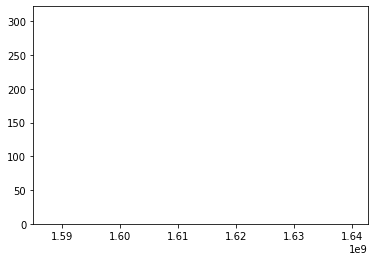

In [42]:
labels = [ 'Datum', 'Gemeinde', 'Covid-Fälle', '…auf Intensiv', 'Betten frei', '… belegt']

fig, ax = plt.subplots()

p1 = ax.bar(divi['date'], divi['faelle_covid_aktuell_invasiv_beatmet'], 0.8, label='Intensivstation')
p2 = ax.bar(divi['date'], divi['faelle_covid_aktuell'], 0.8, bottom=divi['nIntensiv'], label='Covid-Fälle')

plt.show()
